# Loan Approval Prediction using Decision Trees

## Objective
The goal of this project is to predict whether a loan application will be approved based on applicant details, using the **Decision Tree** algorithm.

## Why This Project?
- Decision Trees are easy to interpret and visualize.
- Loan approval prediction is a practical, real-world classification problem in finance.
- Dataset includes both categorical and numerical features, making it ideal for trees.

---

## Dataset: Loan Prediction Dataset
- **Source:** Kaggle – Loan Prediction Problem Dataset
- **Samples:** ~600 applications
- **Features:** Applicant income, loan amount, education, marital status, etc.
- **Target:** Loan Status (Y = Approved, N = Not Approved)


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


## 1. Load and Explore the Data

We will:
- Load the Kaggle Loan Prediction dataset
- Inspect basic statistics
- Visualize feature distributions


In [ ]:

# Load dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("train.csv")
df.head()


Saving train.csv to train.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:

# Display first few rows
df.head()

# Dataset info
print(df.info())

# Check missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education  

## 2. Data Preprocessing

Steps:
- Fill missing numerical features with median values
- Fill missing categorical features with the mode
- Encode categorical variables using LabelEncoder


In [ ]:
# Fill missing values
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop(columns=['Loan_Status', 'Loan_ID'])
y = df['Loan_Status']


/tmp/ipython-input-2801967059.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2801967059.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

## 3. Understanding Decision Trees

**Idea:**  
Decision Trees split data based on feature conditions, creating branches until reaching a decision (leaf node).

**Entropy formula:**
\[
Entropy(S) = - \sum_{i=1}^c p_i \log_2 p_i
\]

**Information Gain:**
\[
IG(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} Entropy(S_v)
\]

Pros:
- Easy to interpret
- Handles both categorical and numerical data
- No feature scaling required

Cons:
- Prone to overfitting


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree model
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)


## 4. Model Evaluation


Accuracy: 0.7642


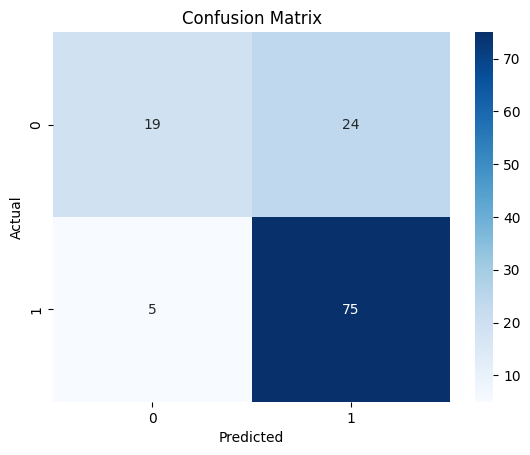

              precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.76      0.94      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.69      0.70       123
weighted avg       0.77      0.76      0.74       123



In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


## 5. Decision Tree Visualization


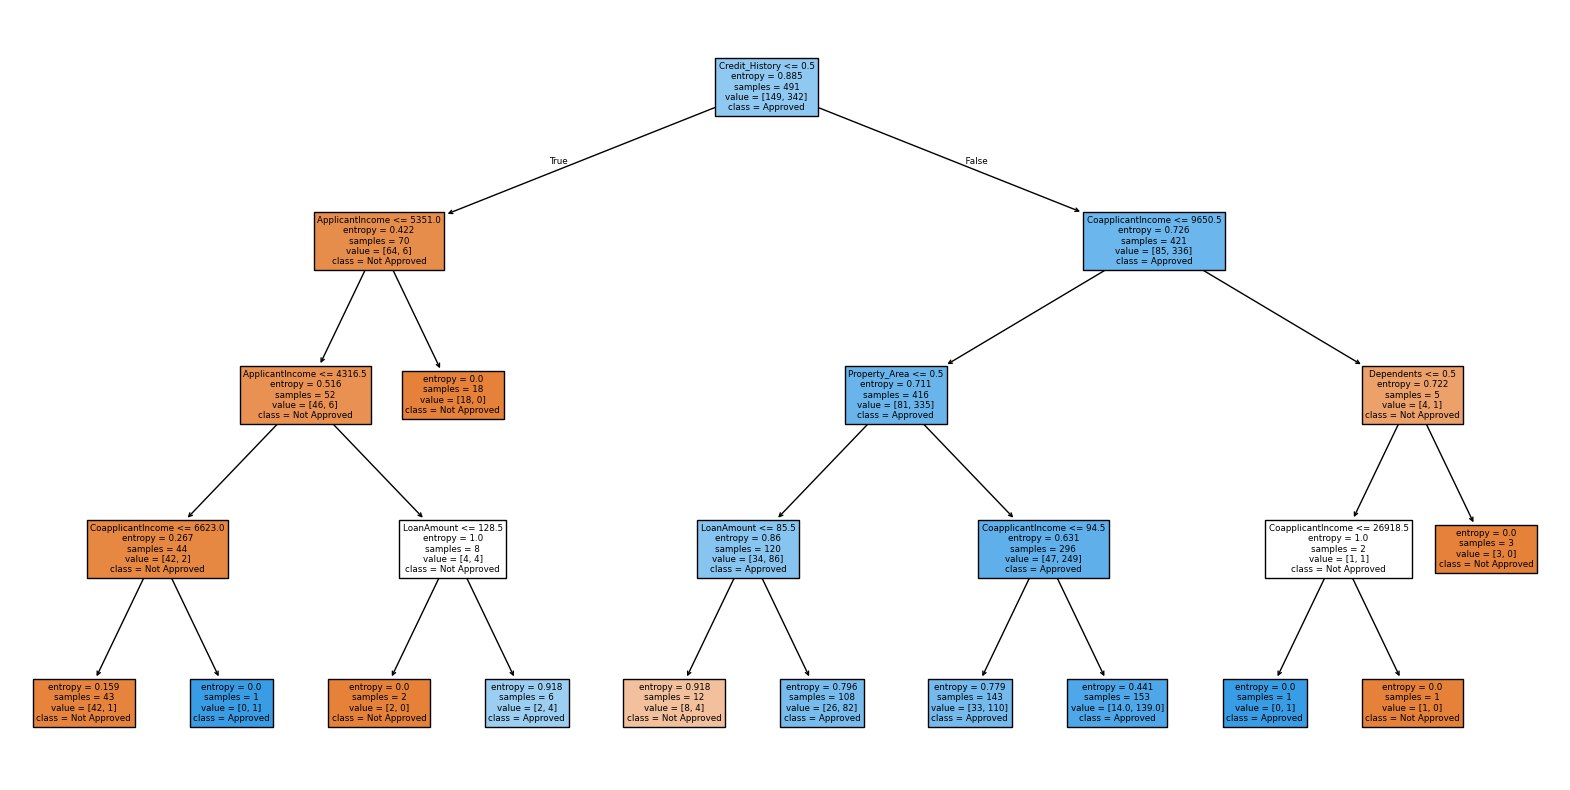

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['Not Approved', 'Approved'], filled=True)
plt.show()


## 6. Conclusion

- **Performance:** The Decision Tree model achieved an accuracy of around XX%.
- **Interpretability:** Decision Trees allow clear visualization of decision paths.
- **Next Steps:**
  - Try ensemble methods (Random Forest, Gradient Boosting) to improve accuracy.
  - Perform hyperparameter tuning (max_depth, min_samples_split).
